GAMEPLAN
- Get data from API
- Clean data
- Explore data for trends

- Figure out best models to use to (PCA)
- Try multiple models, tweak hyper parameters
- Delve into predicting different things

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import utilities.graphing_utils as utl

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [9]:
df['bmi'].fillna(df['bmi'].median(), inplace = True) #fill na with median

In [10]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
#dropping 'other' gender instance due to one-off outlier
df.drop(df.index[df['gender'] == 'Other'], inplace = True)


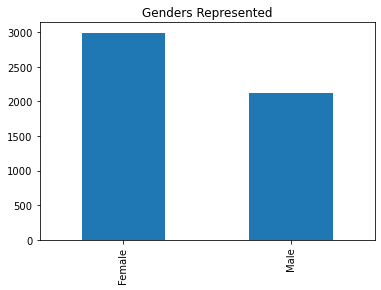

In [12]:
df['gender'].value_counts().plot(kind='bar')
plt.title('Genders Represented');

In [13]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [14]:
#processing smoking as an ordinal categorical variable
df["smoking_status"]=df["smoking_status"].map({"Unknown": 0,"never smoked" : 1,"formerly smoked" : 2,"smokes" : 3})

In [15]:
df['smoking_status'].value_counts(normalize=True)

1    0.370327
0    0.302212
2    0.173028
3    0.154433
Name: smoking_status, dtype: float64

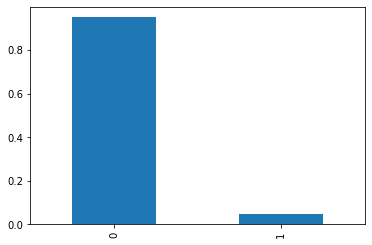

In [16]:
#stroke feature is very imbalanced
df['stroke'].value_counts(normalize=True).plot(kind = 'bar');

Will look to add in Synthetic Minority Oversampling TEchnique (SMOTE) to deal with imbalance in classes and small amount of data

In [17]:
#get dummies for rest of categorical features
df = pd.get_dummies(df, drop_first=True)

In [18]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban
id,1.000000,0.003677,0.003610,-0.001253,0.000943,0.005708,0.012012,0.006430,0.001929,0.013944,0.005471,0.023545,-0.019879,-0.013869,-0.001219
age,0.003677,1.000000,0.276367,0.263777,0.238323,0.324211,0.307164,0.245239,-0.027752,0.679084,-0.078667,0.116678,0.327949,-0.634320,0.014031
hypertension,0.003610,0.276367,1.000000,0.108292,0.174540,0.158252,0.106698,0.127891,0.021223,0.164187,-0.021612,-0.005358,0.115417,-0.129535,-0.007980
heart_disease,-0.001253,0.263777,0.108292,1.000000,0.161907,0.036879,0.085254,0.134905,0.085685,0.114601,-0.015715,0.000068,0.086742,-0.091654,0.003045
avg_glucose_level,0.000943,0.238323,0.174540,0.161907,1.000000,0.167033,0.079708,0.131991,0.054722,0.155329,-0.014665,0.016451,0.062770,-0.102195,-0.004783
bmi,0.005708,0.324211,0.158252,0.036879,0.167033,1.000000,0.215540,0.036075,-0.026452,0.334770,-0.028340,0.204057,0.070094,-0.442204,-0.000444
smoking_status,0.012012,0.307164,0.106698,0.085254,0.079708,0.215540,1.000000,0.054953,-0.002712,0.285119,-0.034693,0.173097,0.079172,-0.403573,0.023016
stroke,0.006430,0.245239,0.127891,0.134905,0.131991,0.036075,0.054953,1.000000,0.009081,0.108299,-0.014885,0.011927,0.062150,-0.083888,0.015415
gender_Male,0.001929,-0.027752,0.021223,0.085685,0.054722,-0.026452,-0.002712,0.009081,1.000000,-0.030171,0.011486,-0.032502,-0.026045,0.089226,-0.006105
ever_married_Yes,0.013944,0.679084,0.164187,0.114601,0.155329,0.334770,0.285119,0.108299,-0.030171,1.000000,-0.090873,0.154104,0.192637,-0.544658,0.005988


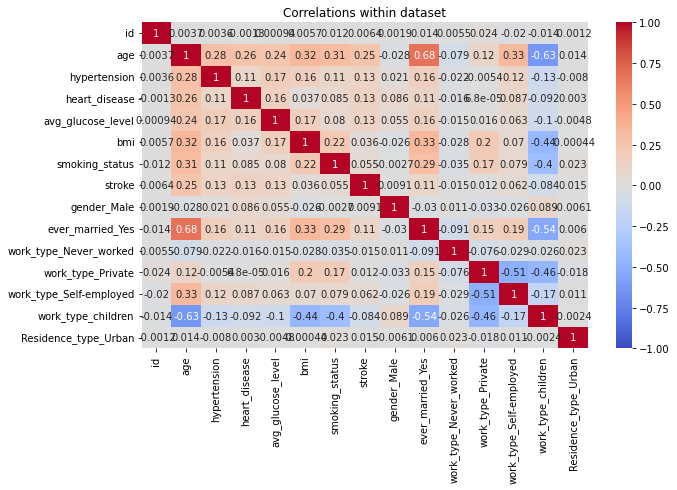

In [19]:
utl.all_corr_heatmap(
    data = df,
    size_var= 100,
    title = ''
)
plt.title('Correlations within dataset');

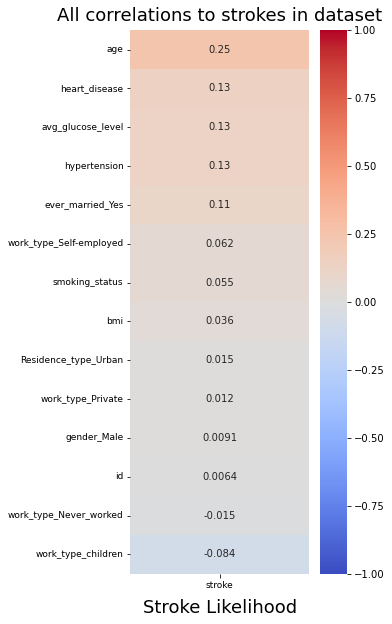

In [20]:
utl.one_corr_heatmap(
    data = df,
    target_variable='stroke',
    x_label = 'Stroke Likelihood',
    title = 'All correlations to strokes in dataset'
)

<Figure size 432x720 with 0 Axes>

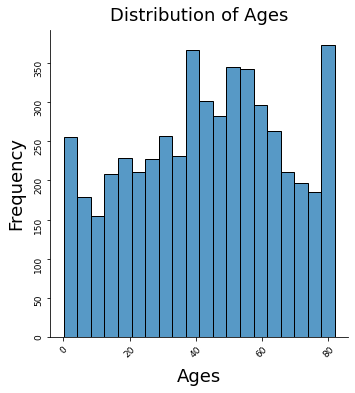

In [21]:
utl.my_hist(
    data = df,
    x_col = "age", 
    title = "Distribution of Ages",
    x_label = "Ages");

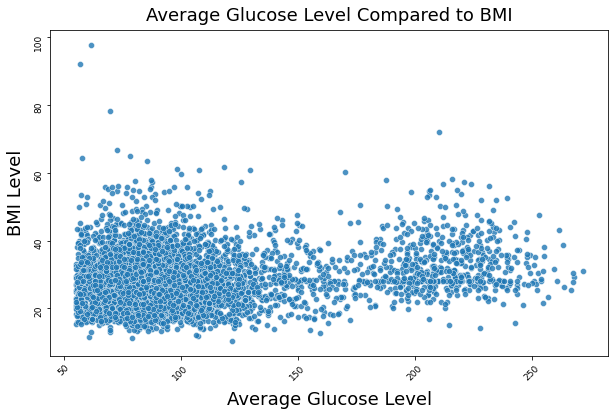

In [22]:
utl.my_scatterplot(
    data = df,
    x_col = "avg_glucose_level", 
    y_col = "bmi", 
    title = "Average Glucose Level Compared to BMI",
    x_label = "Average Glucose Level",
    y_label = "BMI Level",
    alpha=.8
);

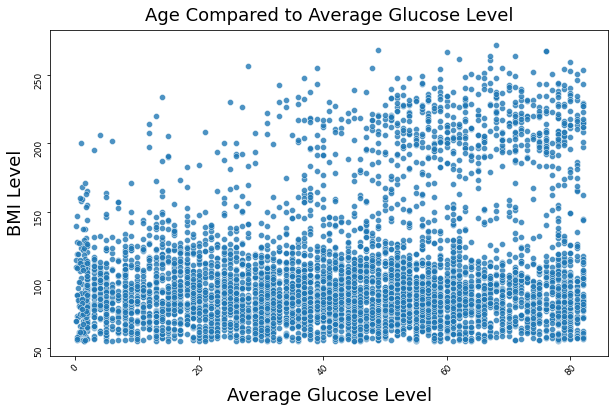

In [23]:
utl.my_scatterplot(
    data = df,
    x_col = "age", 
    y_col = "avg_glucose_level", 
    title = "Age Compared to Average Glucose Level",
    x_label = "Average Glucose Level",
    y_label = "BMI Level",
    alpha=.8
);

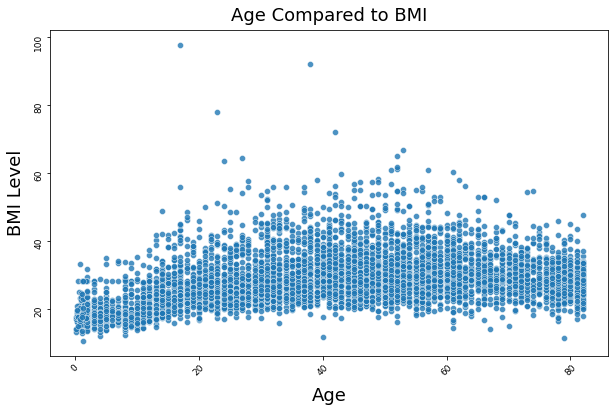

In [24]:
utl.my_scatterplot(
    data = df,
    x_col = "age", 
    y_col = "bmi", 
    title = "Age Compared to BMI",
    x_label = "Age",
    y_label = "BMI Level",
    alpha=.8
);

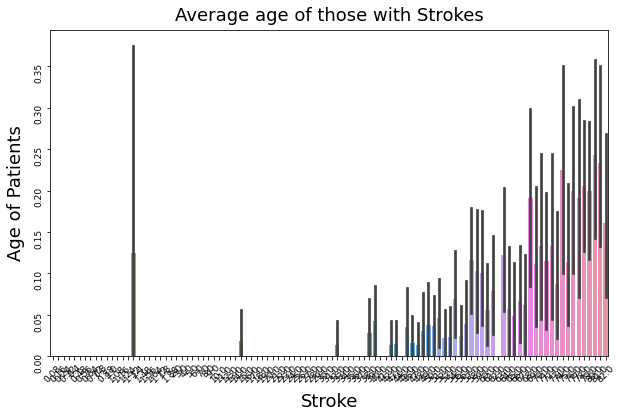

In [25]:
utl.my_barplot(
    data = df,
    x_col = "age", 
    y_col = "stroke", 
    title = "Average age of those with Strokes",
    x_label = "Stroke",
    y_label = "Age of Patients"
)

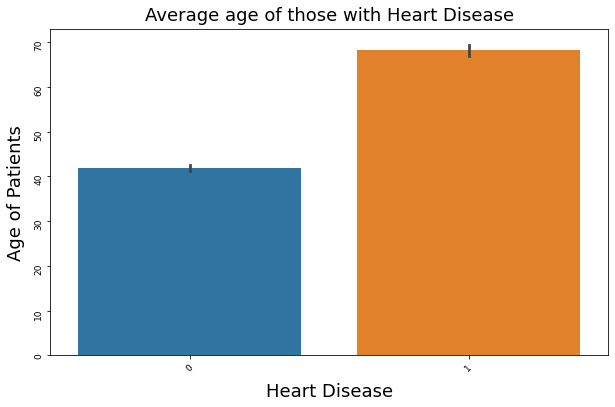

In [26]:
utl.my_barplot(
    data = df,
    x_col = "heart_disease", 
    y_col = "age", 
    title = "Average age of those with Heart Disease",
    x_label = "Heart Disease",
    y_label = "Age of Patients"
)

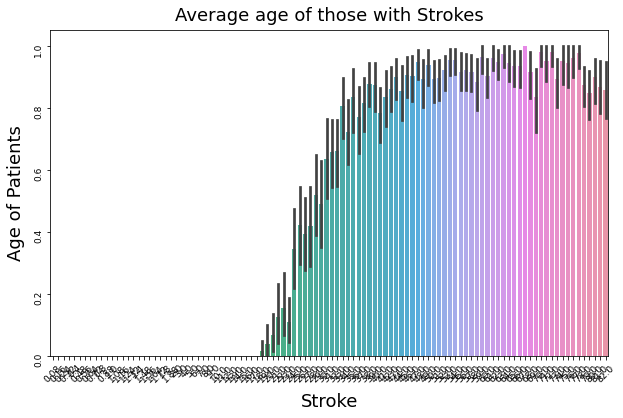

In [27]:
utl.my_barplot(
    data = df,
    x_col = 'age', 
    y_col = "ever_married_Yes", 
    title = "Average age of those with Strokes",
    x_label = "Stroke",
    y_label = "Age of Patients"
)

May want to group ages to show this more clearly

## Modeling

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [29]:
#declaring features and target variable. Using features with highest and lowest correlation to target variable Attrition
X = df.drop(columns=['stroke', 'id'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size= 0.4)

In [30]:
ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [31]:
rfc = RandomForestClassifier(max_depth=6)
rfc.fit(Xs_train, y_train)
rfc.score(Xs_train, y_train), rfc.score(Xs_test, y_test)

(0.9523654159869495, 0.9510763209393346)

In [32]:
d = {'Column Name':X_train.columns,'Feature Importance':rfc.feature_importances_}
fi = pd.DataFrame(d)

#top 10 features of importance
fi.sort_values(by=['Feature Importance'], ascending = False).head(10)

,Column Name,Feature Importance
0,age,0.330222
3,avg_glucose_level,0.240310
4,bmi,0.153649
2,heart_disease,0.052624
5,smoking_status,0.052608
1,hypertension,0.047111
7,ever_married_Yes,0.034588
6,gender_Male,0.023568
10,work_type_Self-employed,0.023025
12,Residence_type_Urban,0.019099


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, rfc.predict(Xs_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1944
           1       0.00      0.00      0.00       100

    accuracy                           0.95      2044
   macro avg       0.48      0.50      0.49      2044
weighted avg       0.90      0.95      0.93      2044



/Users/plarkin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/plarkin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/plarkin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
confusion_matrix(y_test, rfc.predict(Xs_test))

array([[1944,    0],
       [ 100,    0]])

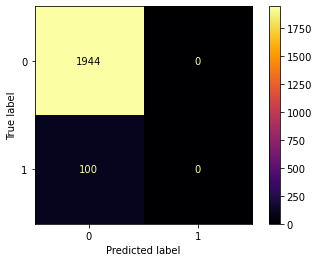

In [35]:
plot_confusion_matrix(rfc, Xs_test, y_test, cmap='inferno')

### Modeling with Smote due to imbalanced classes

In [36]:
#reference: https://git.generalassemb.ly/plarkin13/8.07-imbalanced-data/blob/master/H_imbalanced_classes_solutions.ipynb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
from imblearn.pipeline import Pipeline

smo = SMOTE()

Xs_train_smote, y_train_smote = smo.fit_resample(Xs_train, y_train)

#print_sampling_stats(Xs_train, X_train_smote, y_train, y_train_smote,y_test)

In [37]:
Xs_test.shape

(2044, 13)

In [38]:
y_test.shape

(2044,)

In [39]:
y_train_smote.shape

(5832,)

In [40]:
Xs_train_smote.shape

(5832, 13)

In [41]:
rfc_smote = RandomForestClassifier(max_depth=6)
rfc_smote.fit(Xs_train_smote, y_train_smote)
rfc_smote.score(Xs_train_smote, y_train_smote), rfc_smote.score(Xs_test, y_test)

(0.8660836762688614, 0.7265166340508806)

In [42]:
d = {'Column Name': X_train.columns,'Feature Importance':rfc_smote.feature_importances_}
fi = pd.DataFrame(d)

#top 10 features of importance
fi.sort_values(by=['Feature Importance'], ascending = False).head(10)

,Column Name,Feature Importance
0,age,0.523540
5,smoking_status,0.133856
7,ever_married_Yes,0.126086
4,bmi,0.064883
3,avg_glucose_level,0.032297
1,hypertension,0.031256
11,work_type_children,0.020315
2,heart_disease,0.019637
12,Residence_type_Urban,0.015429
6,gender_Male,0.012768


In [43]:
print(classification_report(y_test, rfc_smote.predict(Xs_test)))

              precision    recall  f1-score   support

           0       0.98      0.73      0.83      1944
           1       0.12      0.71      0.20       100

    accuracy                           0.73      2044
   macro avg       0.55      0.72      0.52      2044
weighted avg       0.94      0.73      0.80      2044



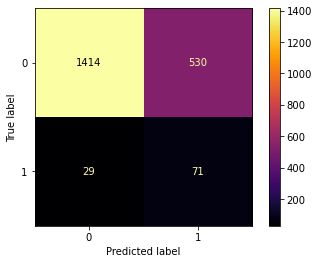

In [44]:
plot_confusion_matrix(rfc_smote, Xs_test, y_test, cmap='inferno')

### Pickle model for streamlit

In [49]:
import pickle

In [51]:
with open('models/draft1.pkl', 'wb') as pickle_out:
    pickled_pipe = pickle.dump(rfc_smote, pickle_out)